In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
sentiment_data=pd.read_csv('fear_greed_index.csv')
trades_data=pd.read_csv('historical_data.csv')

In [4]:
print(sentiment_data.head())
print(trades_data.head())

print(sentiment_data.info())
print(trades_data.info())


    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50 

In [ ]:
#Sentiment Data

sentiment_data['date'] = pd.to_datetime(sentiment_data['date'])
sentiment_data['classification'] = sentiment_data['classification'].str.lower()

# Encode sentiment
sentiment_data['sentiment_score'] = sentiment_data['classification'].map({
    'extreme fear': 0,
    'fear': 0,
    'greed': 1,
    'extreme greed': 1
})

# Convert timestamp
trades_data['Timestamp IST'] = pd.to_datetime(
    trades_data['Timestamp IST'],
    dayfirst=True,
    errors='coerce'
)
# Extract trade date
trades_data = trades_data.dropna(subset=['Timestamp IST'])
trades_data['date'] = trades_data['Timestamp IST'].dt.date
trades_data['date'] = pd.to_datetime(trades_data['date'])


# Remove invalid trades
trades_data = trades_data[trades_data['Size USD'] > 0]

# Handle missing PnL
trades_data['Closed PnL'] = trades_data['Closed PnL'].fillna(0)

trades_data.head()



,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


In [6]:
merged_df = trades_data.merge(
    sentiment_data[['date', 'classification', 'sentiment_score']],
    on='date',
    how='left'
)

merged_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification,sentiment_score
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,extreme greed,1.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,extreme greed,1.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,extreme greed,1.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,extreme greed,1.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,extreme greed,1.0


In [7]:
# Profit indicator
merged_df['is_profitable'] = merged_df['Closed PnL'] > 0

# Risk metric (proxy)
merged_df['risk_score'] = merged_df['Size USD']

# Trade direction encoding
merged_df['trade_direction'] = merged_df['Side'].map({
    'BUY': 1,
    'SELL': -1
})

merged_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Crossed,Fee,Trade ID,Timestamp,date,classification,sentiment_score,is_profitable,risk_score,trade_direction
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,extreme greed,1.0,False,7872.16,1
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,extreme greed,1.0,False,127.68,1
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,extreme greed,1.0,False,1150.63,1
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,extreme greed,1.0,False,1142.04,1
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,extreme greed,1.0,False,69.75,1


classification
extreme fear     34.537862
extreme greed    67.913239
fear             54.300059
greed            42.760561
neutral          34.307718
Name: Closed PnL, dtype: float64


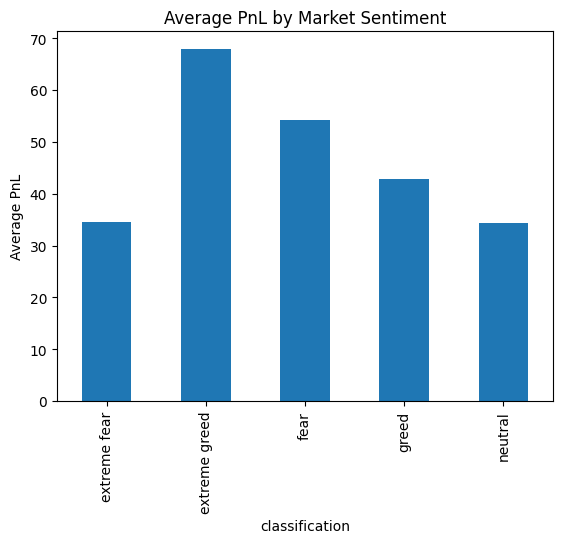

In [8]:
pnl_by_sentiment = merged_df.groupby('classification')['Closed PnL'].mean()
print(pnl_by_sentiment)

pnl_by_sentiment.plot(kind='bar', title='Average PnL by Market Sentiment')
plt.ylabel('Average PnL')
plt.show()


classification
extreme fear     0.370607
extreme greed    0.465083
fear             0.420842
greed            0.384981
neutral          0.396991
Name: is_profitable, dtype: float64


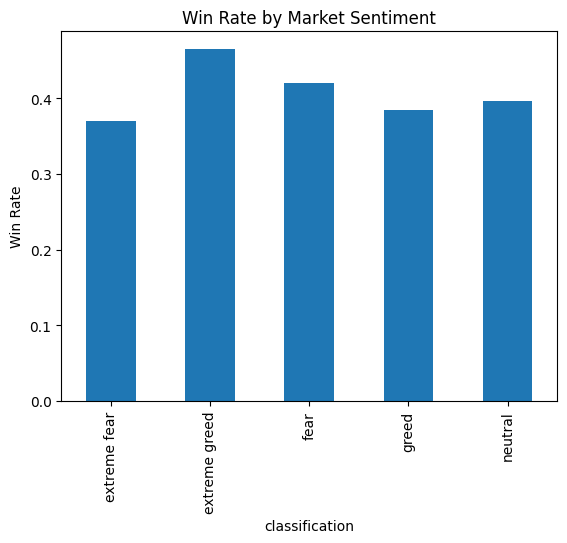

In [9]:
win_rate = merged_df.groupby('classification')['is_profitable'].mean()
print(win_rate)

win_rate.plot(kind='bar', title='Win Rate by Market Sentiment')
plt.ylabel('Win Rate')
plt.show()


classification
extreme fear     5349.731843
extreme greed    3113.185707
fear             7817.500563
greed            5739.166214
neutral          4782.732661
Name: Size USD, dtype: float64


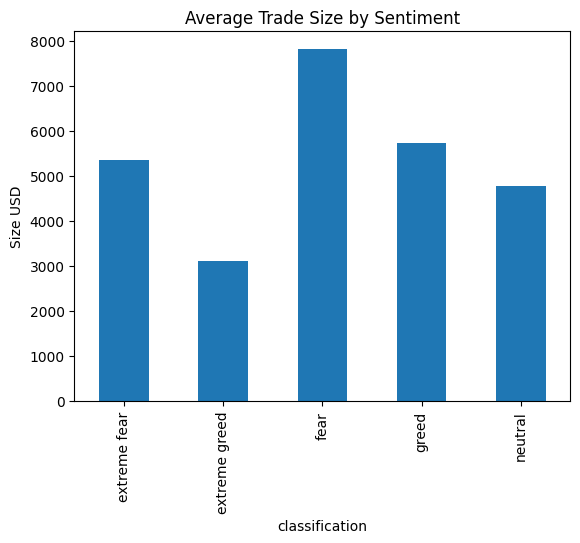

In [10]:
size_sentiment = merged_df.groupby('classification')['Size USD'].mean()
print(size_sentiment)

size_sentiment.plot(kind='bar', title='Average Trade Size by Sentiment')
plt.ylabel('Size USD')
plt.show()


classification
extreme fear     1.116291
extreme greed    0.676105
fear             1.495438
greed            1.254871
neutral          1.044798
Name: Fee, dtype: float64


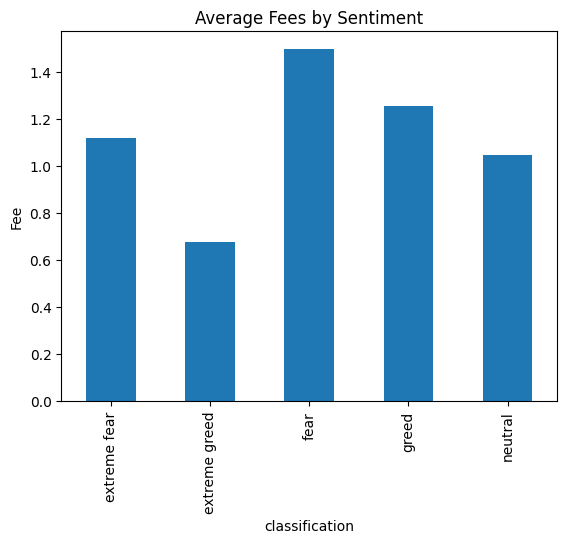

In [11]:
fee_sentiment = merged_df.groupby('classification')['Fee'].mean()
print(fee_sentiment)

fee_sentiment.plot(kind='bar', title='Average Fees by Sentiment')
plt.ylabel('Fee')
plt.show()


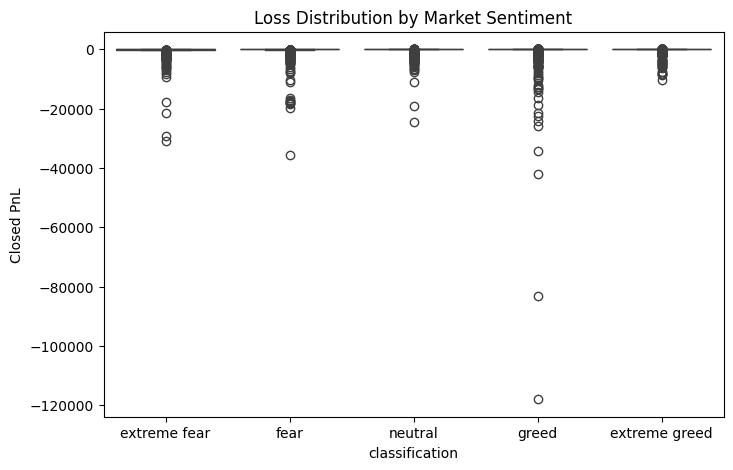

In [12]:
losses = merged_df[merged_df['Closed PnL'] < 0]

plt.figure(figsize=(8,5))
sns.boxplot(x='classification', y='Closed PnL', data=losses)
plt.title('Loss Distribution by Market Sentiment')
plt.show()


In [13]:
daily_stats = merged_df.groupby(['date', 'classification']).agg({
    'Closed PnL': 'sum',
    'Trade ID': 'count',
    'Size USD': 'mean'
}).reset_index()

daily_stats.rename(columns={'Trade ID': 'total_trades'}, inplace=True)
daily_stats.head()


,date,classification,Closed PnL,total_trades,Size USD
0,2023-05-01,greed,0.000000,3,159.000000
1,2023-12-05,extreme greed,0.000000,9,5556.203333
2,2023-12-14,greed,-205.434737,11,10291.213636
3,2023-12-15,greed,-24.632034,2,5304.975000
4,2023-12-16,greed,0.000000,3,5116.256667


In [14]:
trader_pnl = merged_df.groupby('Account')['Closed PnL'].sum().reset_index()

top_traders = trader_pnl.sort_values('Closed PnL', ascending=False).head(10)
bottom_traders = trader_pnl.sort_values('Closed PnL').head(10)

merged_df['trader_group'] = 'Others'
merged_df.loc[merged_df['Account'].isin(top_traders['Account']), 'trader_group'] = 'Top Trader'
merged_df.loc[merged_df['Account'].isin(bottom_traders['Account']), 'trader_group'] = 'Bottom Trader'

group_analysis = merged_df.groupby(['trader_group', 'classification'])['Size USD'].mean()
print(group_analysis)


trader_group   classification
Bottom Trader  extreme fear      8209.505961
               extreme greed     1338.432151
               fear              7615.447240
               greed             2112.986952
               neutral           4252.664562
Others         extreme fear      6323.938280
               extreme greed     3275.382646
               fear              4434.002928
               greed             3747.048792
               neutral           3698.614076
Top Trader     extreme fear      3817.090117
               extreme greed     3561.086032
               fear              8579.253851
               greed             9069.660212
               neutral           5487.740626
Name: Size USD, dtype: float64


In [ ]:
if 'Timestamp' in merged_df.columns:
    merged_df.drop(columns=['Timestamp'], inplace=True)


In [16]:
merged_df.to_csv("merged_trader_sentiment_data.csv", index=False)
